In [3]:
from matplotlib import pyplot as plt
import matplotlib as mpl
import numpy as np
import torch
import math
import networkx as nx
from tqdm import tqdm 
from PIL import Image
from crp.image import imgify, vis_opaque_img, plot_grid
from collections import Counter

from tigramite import plotting as tp

%matplotlib inline

In [28]:
from cmiknnmixed import CMIknnMixed
from crp_attribution import CRPAttribution
from network import train_network, performance_analysis, accuracy_per_class
from causal_discovery import CausalDiscovery
from plotting import plot_multipartite, draw_graph
from biased_dsprites_dataset import get_dataset, get_biased_loader
from crp_hierarchies import sample_from_categories, average_hierarchies
%reload_ext autoreload
%autoreload 2

1 1
{0: Counter({False: 244986, True: 774}), 1: Counter({True: 244912, False: 848})}
1 1
491520


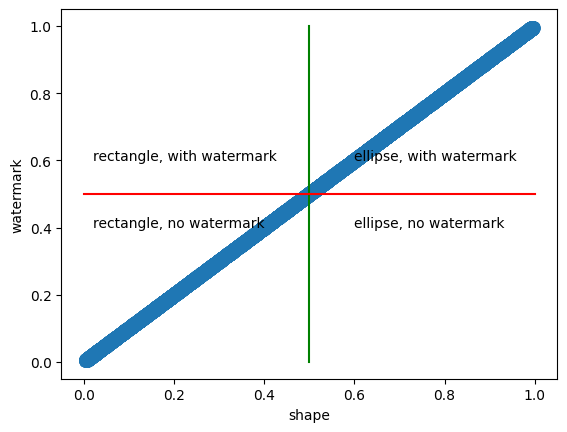

In [38]:
BATCH_SIZE = 128
BIAS = 0.99
STRENGTH = 0.5
NAME = "exp"
ITEMS_PER_CLASS = 245760

train_ds, train_loader, test_ds, test_loader = get_dataset(BIAS, STRENGTH)

print(len(train_ds))

In [39]:
model = train_network(train_loader, BIAS, STRENGTH, NAME, BATCH_SIZE, load=False, retrain=False)

cpu
exp_99_5.pickle
EPOCH 1:


  batch 1100 correct 99.68% loss 0.02: : 1152it [00:40, 28.26it/s]


loss epoch: 0.0216395890340209
EPOCH 2:


  batch 1100 correct 99.7% loss 0.02: : 1152it [00:40, 28.36it/s] 


loss epoch: 0.020916301768738776
EPOCH 3:


  batch 1100 correct 99.7% loss 0.02: : 1152it [00:52, 22.04it/s] 

loss epoch: 0.02055419061682187


In [40]:
crp_attribution = CRPAttribution(model, test_ds, NAME, STRENGTH, BIAS)


In [41]:
crp_attribution.compute_feature_vis()

computing feature vis
Running Analysis...


100%|██████████| 15360/15360 [11:11<00:00, 22.87it/s]


100%|██████████| 160/160 [00:00<00:00, 1777.74it/s]


Layer: convolutional_layers.0


100%|██████████| 6/6 [00:00<00:00, 14.55it/s]


Layer: convolutional_layers.3


  0%|          | 0/6 [00:00<?, ?it/s]/home/lilli/miniconda3/envs/mt/lib/python3.10/site-packages/zennit/image.py:187: RuntimeWarning: invalid value encountered in divide
  array = (array - vmin) / (vmax - vmin)
100%|██████████| 6/6 [00:00<00:00, 11.47it/s]


Layer: convolutional_layers.6


100%|██████████| 6/6 [00:00<00:00, 11.28it/s]


Layer: linear_layers.0


100%|██████████| 6/6 [00:00<00:00, 10.10it/s]


Layer: linear_layers.2


100%|██████████| 2/2 [00:00<00:00,  7.25it/s]


{'r_max': ['crp-data/exp_99_5_fv/RelMax_sum_normed/linear_layers.2_',
  'crp-data/exp_99_5_fv/RelMax_sum_normed/linear_layers.0_',
  'crp-data/exp_99_5_fv/RelMax_sum_normed/convolutional_layers.6_',
  'crp-data/exp_99_5_fv/RelMax_sum_normed/convolutional_layers.3_',
  'crp-data/exp_99_5_fv/RelMax_sum_normed/convolutional_layers.0_'],
 'a_max': ['crp-data/exp_99_5_fv/ActMax_sum_normed/convolutional_layers.0_',
  'crp-data/exp_99_5_fv/ActMax_sum_normed/convolutional_layers.3_',
  'crp-data/exp_99_5_fv/ActMax_sum_normed/convolutional_layers.6_',
  'crp-data/exp_99_5_fv/ActMax_sum_normed/linear_layers.0_',
  'crp-data/exp_99_5_fv/ActMax_sum_normed/linear_layers.2_'],
 'r_stats': ['crp-data/exp_99_5_fv/RelStats_sum_normed/linear_layers.2/0_',
  'crp-data/exp_99_5_fv/RelStats_sum_normed/linear_layers.0/0_',
  'crp-data/exp_99_5_fv/RelStats_sum_normed/convolutional_layers.6/0_',
  'crp-data/exp_99_5_fv/RelStats_sum_normed/convolutional_layers.3/0_',
  'crp-data/exp_99_5_fv/RelStats_sum_normed

/home/lilli/miniconda3/envs/mt/lib/python3.10/site-packages/crp/image.py:288: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Counter({'1_1.0': 54, '0_0.0': 54, '0_1.0': 2}) ['1_1.0', '1_1.0', '1_1.0', '1_1.0', '1_1.0', '0_0.0', '0_0.0', '0_0.0', '1_1.0', '1_1.0', '1_1.0', '1_1.0', '0_0.0', '1_1.0', '1_1.0', '1_1.0', '0_1.0', '0_0.0', '0_0.0', '0_0.0', '0_0.0', '0_0.0', '1_1.0', '0_0.0', '0_0.0', '0_0.0', '1_1.0', '0_0.0', '1_1.0', '1_1.0', '0_0.0', '1_1.0', '1_1.0', '1_1.0', '0_0.0', '0_0.0', '0_0.0', '1_1.0', '1_1.0', '1_1.0', '1_1.0', '0_0.0', '0_0.0', '0_1.0', '0_0.0', '1_1.0', '0_0.0', '1_1.0', '1_1.0', '1_1.0', '1_1.0', '0_0.0', '0_0.0', '0_0.0', '0_0.0', '0_0.0', '1_1.0', '0_0.0', '0_0.0', '0_0.0', '0_0.0', '0_0.0', '1_1.0', '0_0.0', '1_1.0', '0_0.0', '0_0.0', '0_0.0', '1_1.0', '1_1.0', '0_0.0', '0_0.0', '0_0.0', '0_0.0', '0_0.0', '1_1.0', '1_1.0', '1_1.0', '0_0.0', '1_1.0', '1_1.0', '0_0.0', '0_0.0', '0_0.0', '0_0.0', '0_0.0', '0_0.0', '0_0.0', '1_1.0', '1_1.0', '1_1.0', '1_1.0', '1_1.0', '1_1.0', '0_0.0', '0_0.0', '1_1.0', '1_1.0', '1_1.0', '1_1.0', '0_0.0', '0_0.0', '1_1.0', '0_0.0', '1_1.0', '0_0.0

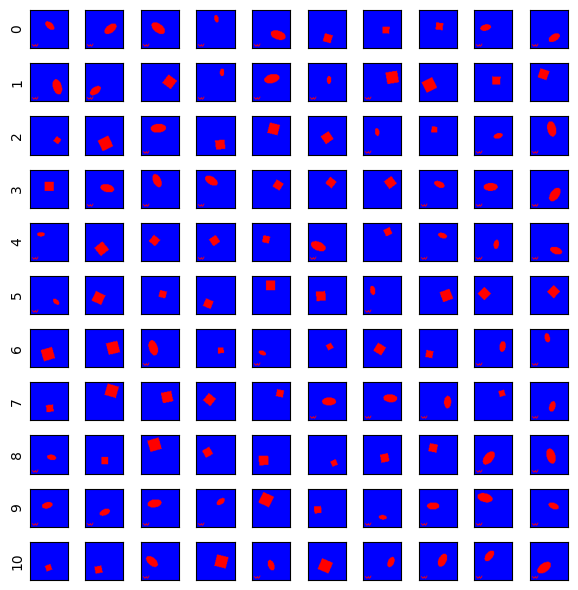

In [42]:
imgs = {}
i = 0
wms = []
for batch in train_loader:
    data, labels = batch
    imgs[f"{i}"] = [imgify(data[x]) for x in range(10)]
    wms += [f'{labels[j]}_{data[j][0,57,12]}' for j in range(10) ]
    i += 1
    if i > 10:
        break
plot_grid(imgs)
print(Counter(wms), wms)

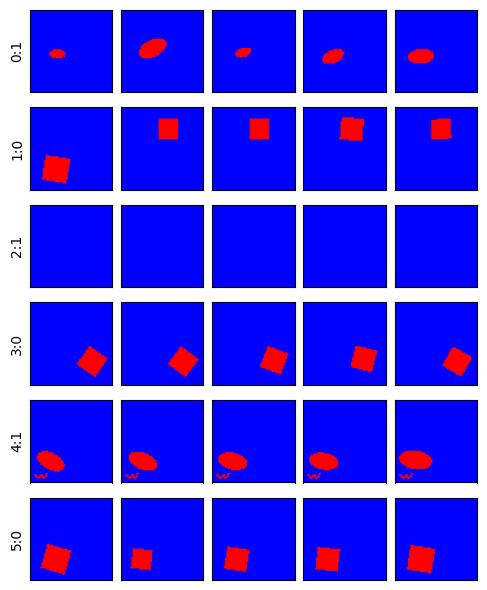

In [46]:
crp_attribution.make_all_relevances("convolutional_layers.6", range(6))

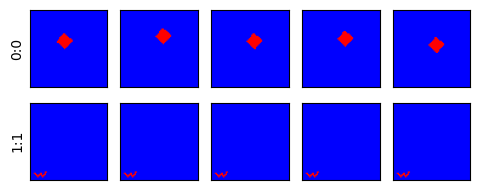

In [48]:
crp_attribution.make_all_relevances("linear_layers.2", range(2))

output: tensor([[-2.3565,  4.2852]]), 
 latents: [ 1  0 33 14  0], 
 watermark: True, 
 prediction:1  
 
 convolutional_layers.0: 
 3: 35.84%, 5: 18.96%, 4: 15.28%, 2: 15.01%, 0: 14.75%, 1: 0.17% 
 
 convolutional_layers.3: 
 1: 48.25%, 3: 20.25%, 4: 15.64%, 2: 13.2%, 5: 2.41%, 0: -0.25% 
 
 convolutional_layers.6: 
 4: 88.41%, 5: 8.99%, 2: 0.92%, 1: 0.34%, 0: 0.0%, 3: -1.35% 
 
 linear_layers.0: 
 1: 83.17%, 0: 16.83%, 5: 0.0%, 4: 0.0%, 3: 0.0%, 2: 0.0% 
 
 linear_layers.2: 
 1: 100.0%, 0: 0.0% 


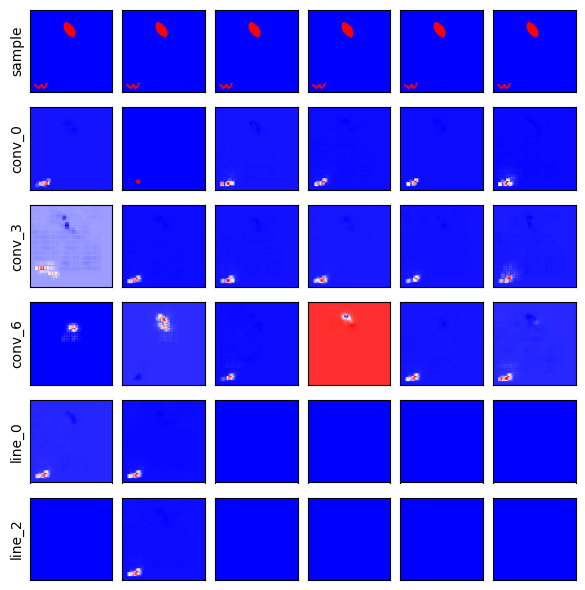

In [53]:
crp_attribution.image_info(280000)

In [54]:
causd = CausalDiscovery(test_ds, model, crp_attribution)

In [70]:
new_layers = [
    ["factors", ["shape", "scale", "rot", "posX", "posY", "watermark"]],
    #["convolutional_layers.0", range(6)],
    #["convolutional_layers.3", range(6)],
    #["convolutional_layers.6", range(6)],
    ["linear_layers.0", range(6)],
    #["linear_layers.2", range(2)],
     ["prediction",   ["class"]],  #["rectangle", "ellipse"]] # 
]  # , ["prediction", range(3)]
causd.change_layers(new_layers)

dataframe, var_names, layers, indices = causd.no_constants_df(with_type=True)

all variables: (14,),
 non-constant variables: (13,),                
 shape of dataset: (2000, 13) 
 new layers: 
[['factors', ['shape', 'scale', 'rot', 'posX', 'posY', 'watermark']], ['linear_layers.0', [0, 1, 2, 3, 4]], ['linear_layers.2', [0, 1]]]
 var names = ['facts_shape' 'facts_scale' 'facts_rot' 'facts_posX' 'facts_posY'
 'facts_watermark' 'line0_0' 'line0_1' 'line0_2' 'line0_3' 'line0_4'
 'line2_0' 'line2_1']


In [71]:
results = causd.causal_discovery(
    layers, dataframe, test="CMIknnMixed", link_assum=True
)


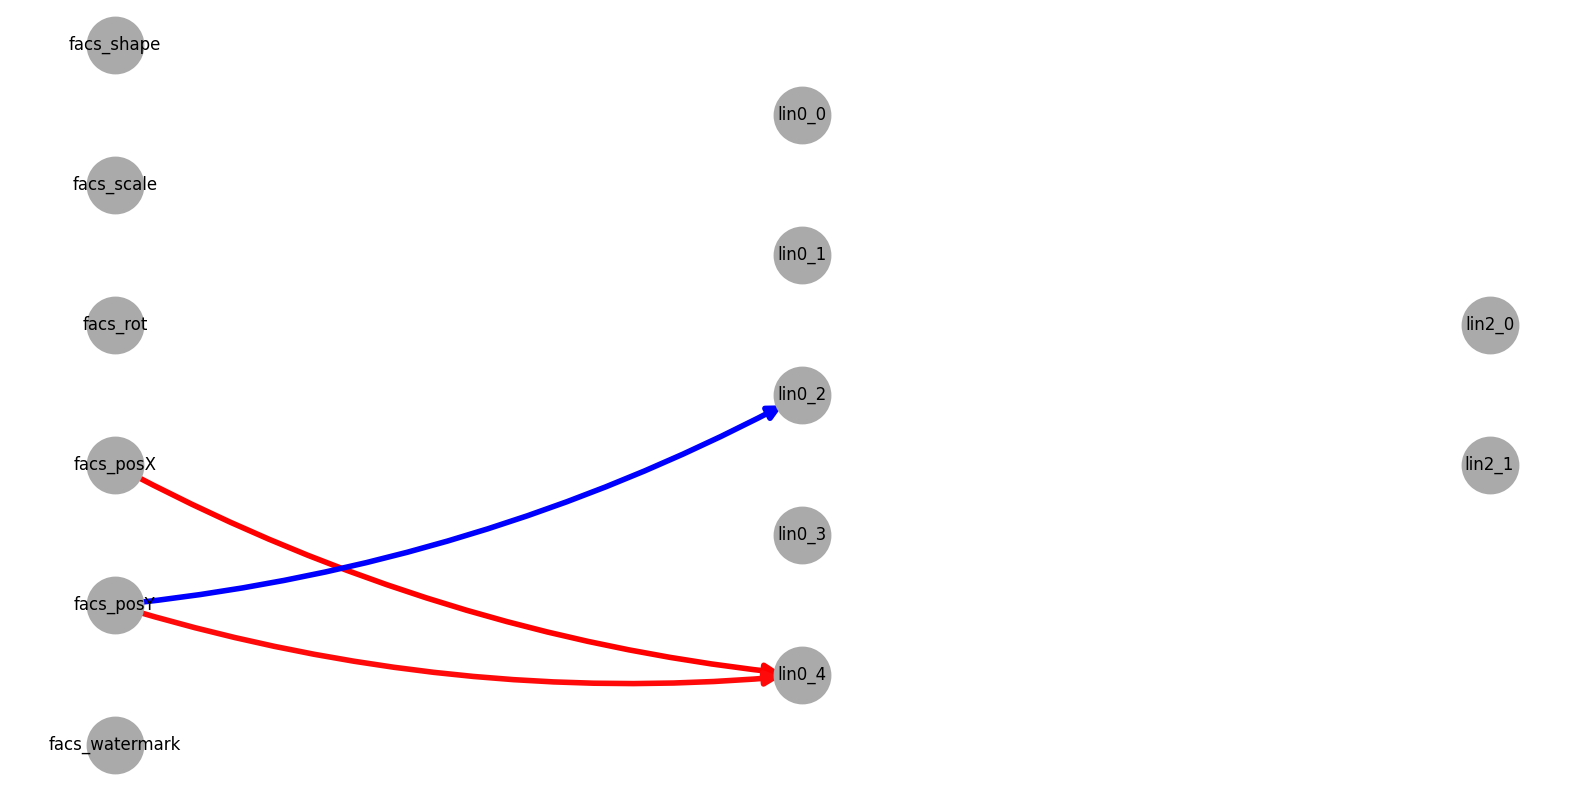

In [72]:
plot_multipartite(results, layers)

In [58]:
indices = sample_from_categories(test_ds)
rele, cluster_data = average_hierarchies(crp_attribution, indices)

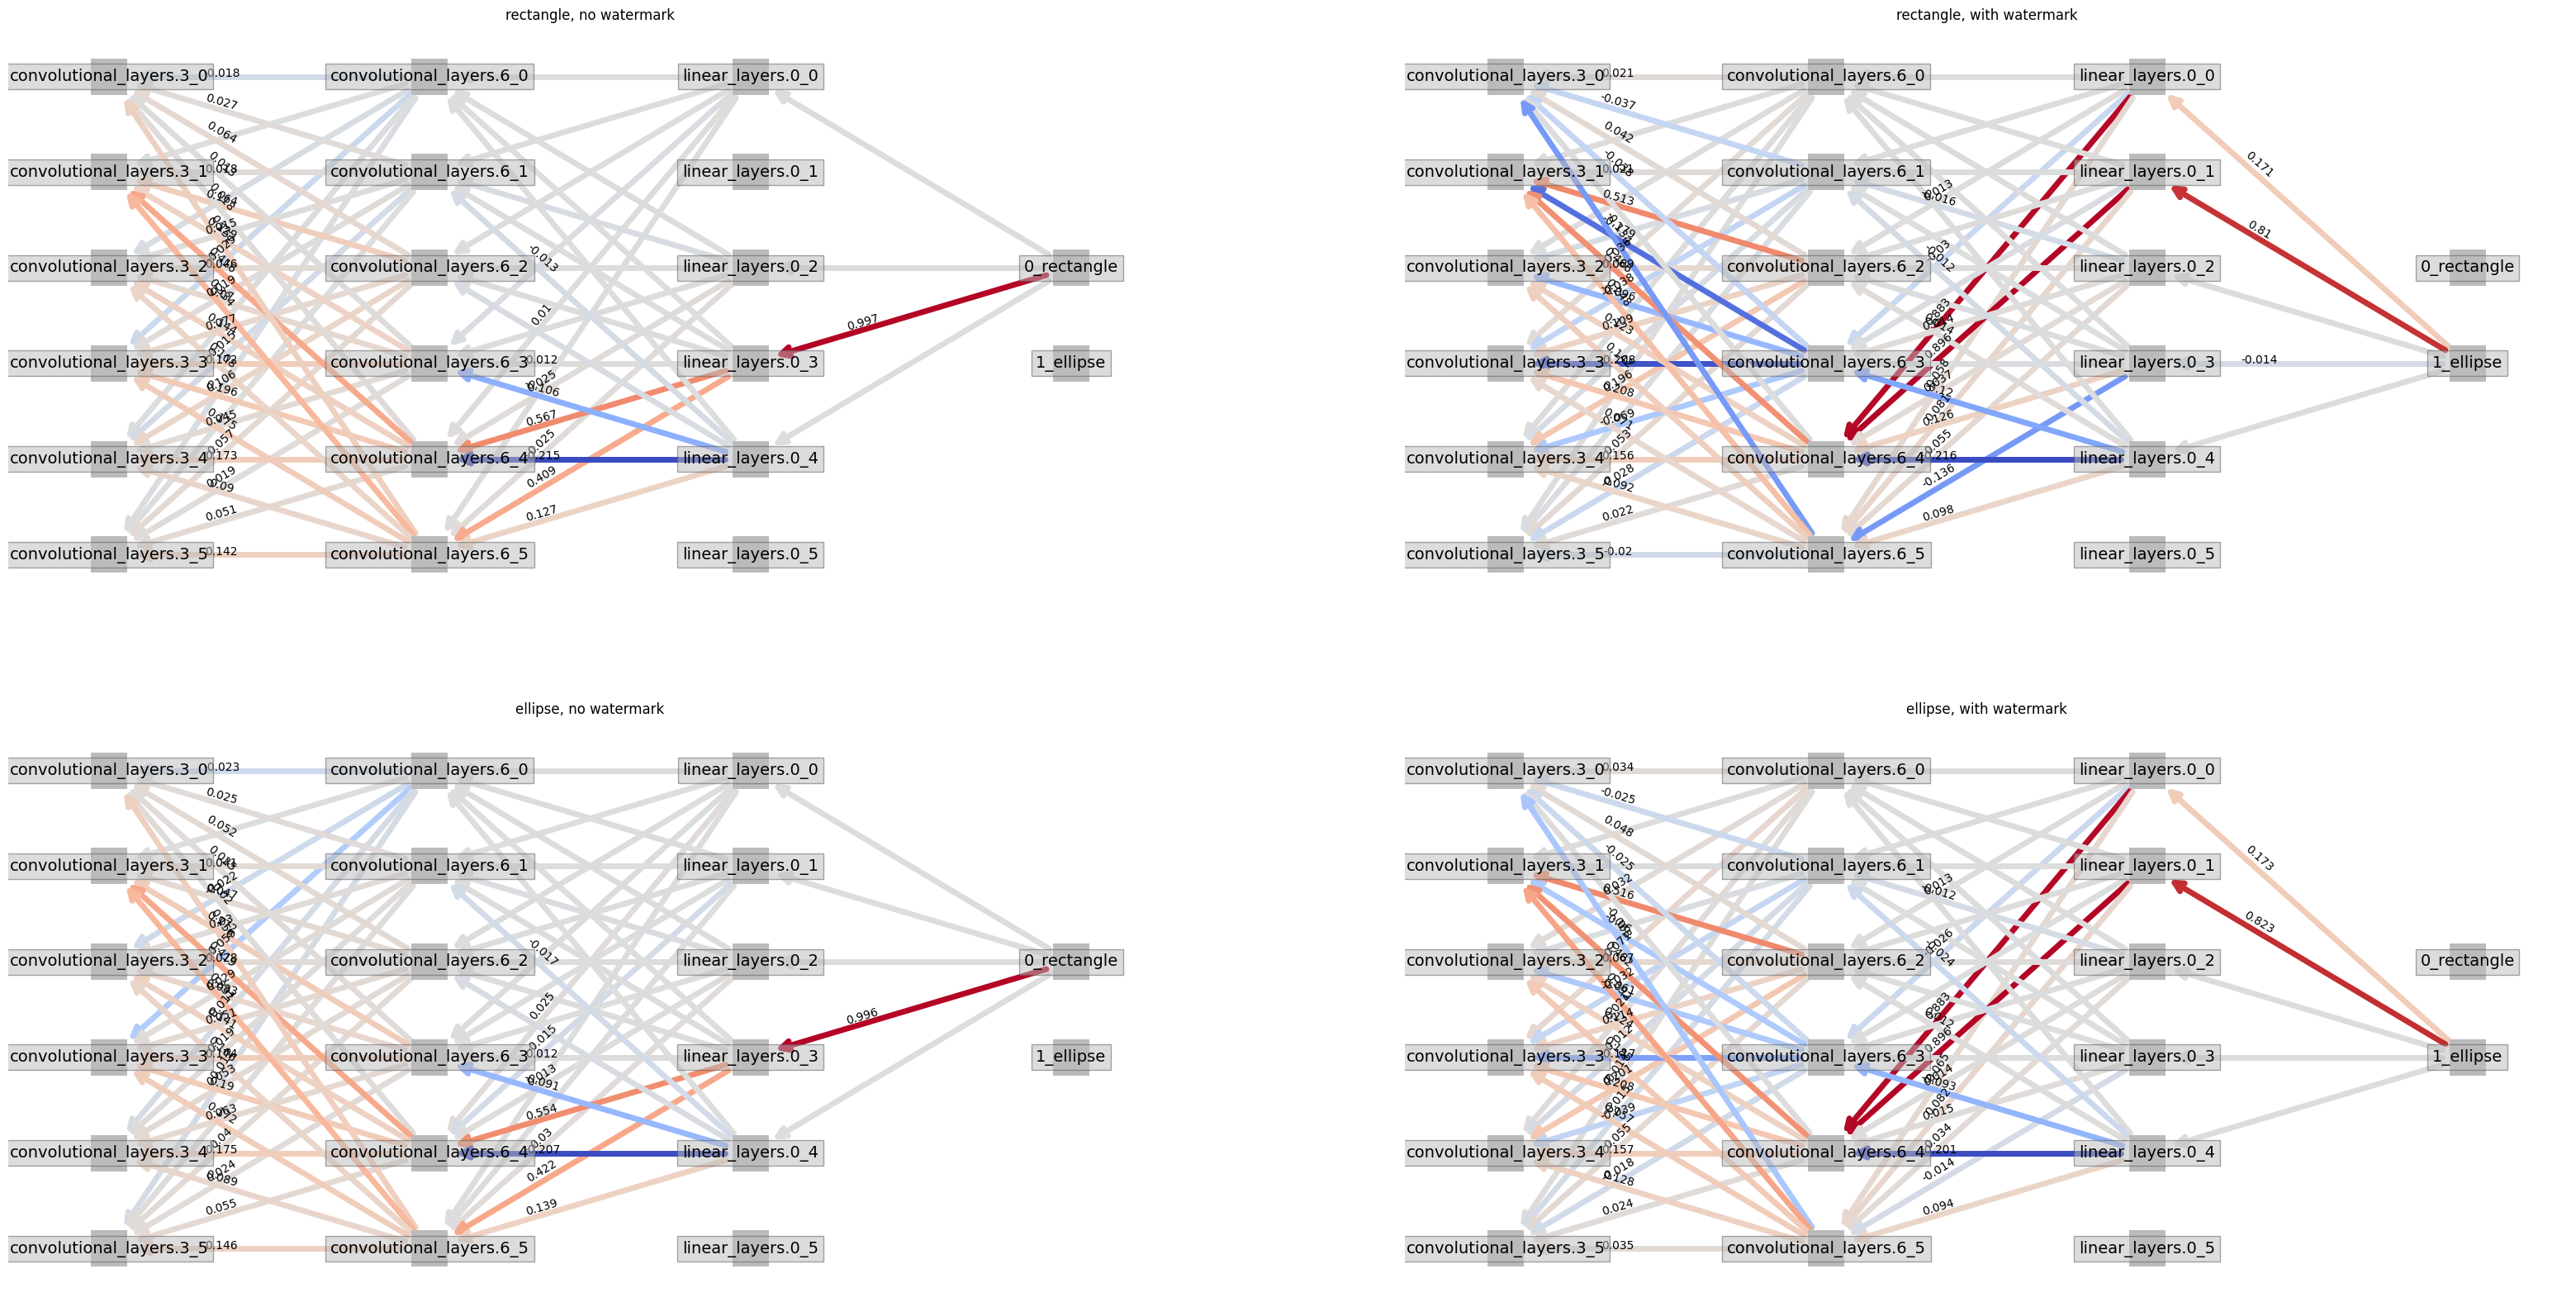

In [60]:
fig = plt.figure(figsize=(40, 20))

ax0 = fig.add_subplot(221, frame_on=False)
ax1 = fig.add_subplot(222, frame_on=False)
ax2 = fig.add_subplot(223, frame_on=False)
ax3 = fig.add_subplot(224, frame_on=False)
draw_graph(list(rele["nodes"]), rele[0][0], ax0)
ax0.title.set_text('rectangle, no watermark')
draw_graph(list(rele["nodes"]), rele[0][1], ax1)
ax1.title.set_text('rectangle, with watermark')
draw_graph(list(rele["nodes"]), rele[1][0], ax2)
ax2.title.set_text('ellipse, no watermark')
draw_graph(list(rele["nodes"]), rele[1][1], ax3)
ax3.title.set_text('ellipse, with watermark')

1 1
{0: Counter({True: 123163, False: 122597}), 1: Counter({False: 123197, True: 122563})}


100%|██████████| 1152/1152 [00:39<00:00, 29.49it/s]


acc_p_c_nobias: [49.90778411 49.78837701]


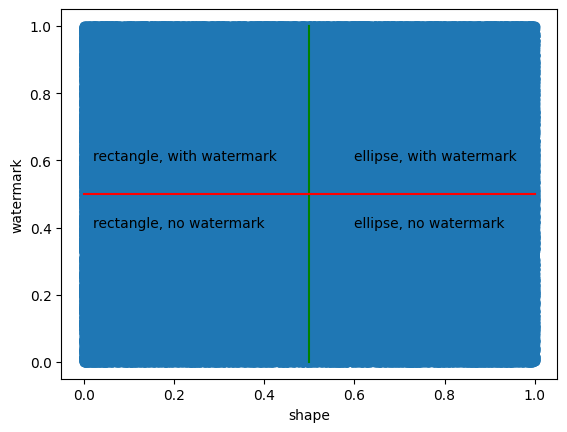

In [61]:
nobias = get_biased_loader(0.0, 0.5)
acc_p_c_nobias = accuracy_per_class(model, nobias)
print(f"acc_p_c_nobias: {acc_p_c_nobias}")

1 1
{0: Counter({True: 245760}), 1: Counter({True: 245760})}


100%|██████████| 1152/1152 [00:35<00:00, 32.22it/s]


acc_p_c_allwm: [1.35611608e-03 1.00000000e+02]


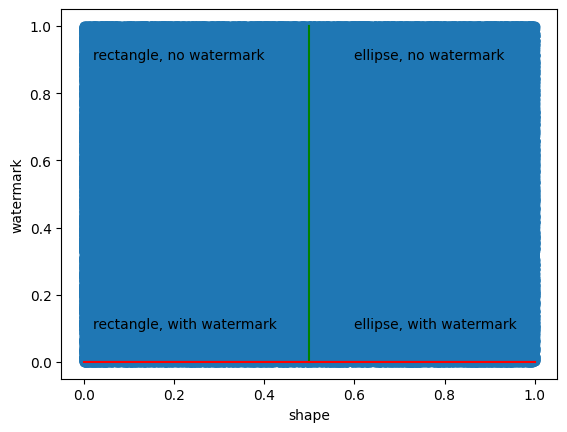

In [64]:
allwm = get_biased_loader(0.0, 0)
acc_p_c_allwm = accuracy_per_class(model, allwm)
print(f"acc_p_c_allwm: {acc_p_c_allwm}")

1 1
{0: Counter({False: 245760}), 1: Counter({False: 245760})}


100%|██████████| 1152/1152 [00:34<00:00, 33.08it/s]


acc_p_c_nowm: [100.   0.]


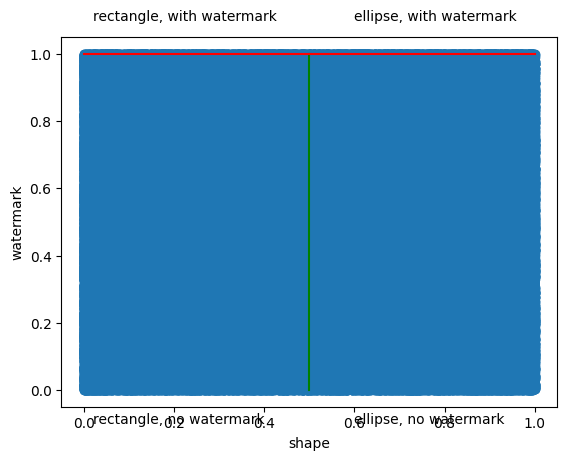

In [63]:
nowm = get_biased_loader(0.0, 1)
acc_p_c_nowm = accuracy_per_class(model, nowm)
print(f"acc_p_c_nowm: {acc_p_c_nowm}")

1 1
{0: Counter({False: 245760}), 1: Counter({True: 245760})}


100%|██████████| 1152/1152 [00:32<00:00, 35.64it/s]


acc_p_c_fullbias: [100. 100.]


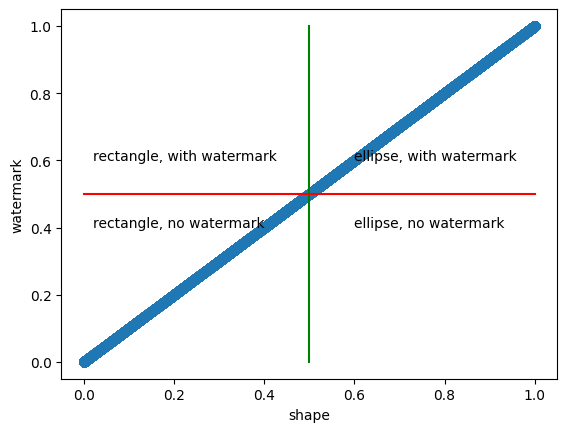

In [65]:
fullbias = get_biased_loader(1, 0.5)
acc_p_c_fullbias = accuracy_per_class(model, fullbias)
print(f"acc_p_c_fullbias: {acc_p_c_fullbias}")

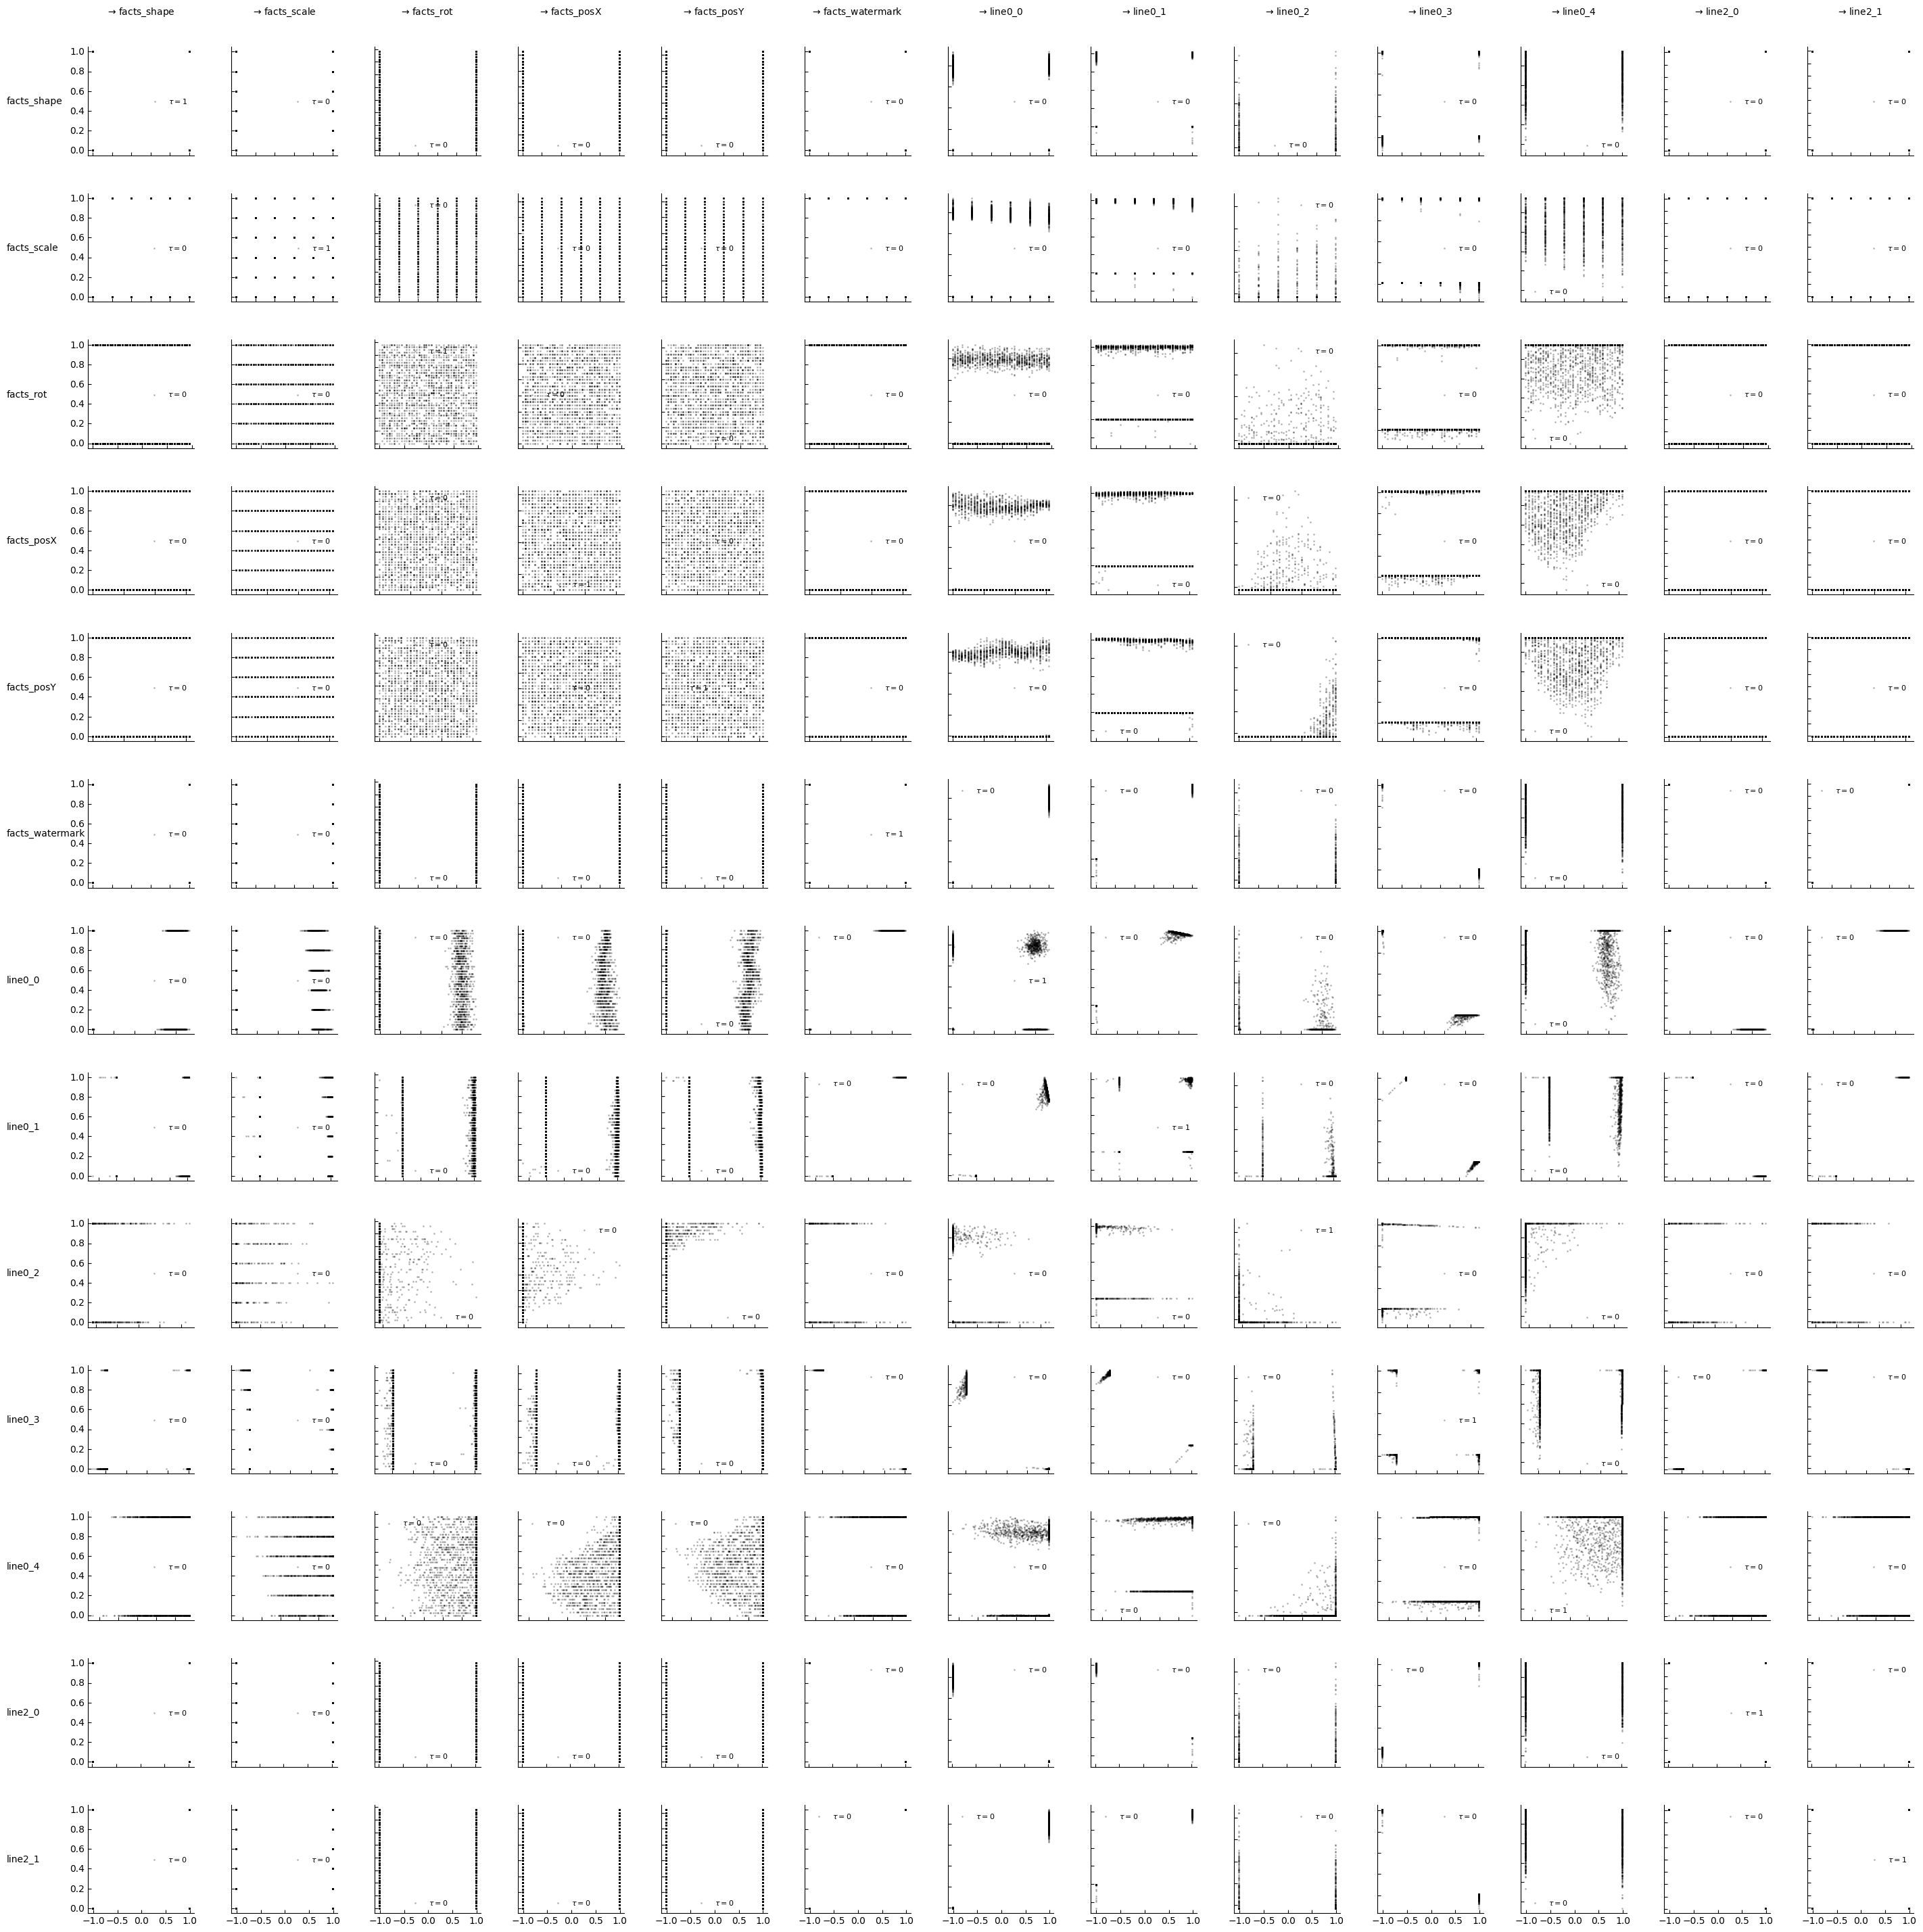

In [69]:
setup_args = {"figsize": (30,30),"label_space_left": 0.05,"label_space_top": 0.03}
tp.plot_scatterplots(dataframe=dataframe, add_scatterplot_args={'matrix_lags':None}, 
                    setup_args=setup_args); plt.show()